<h> This Project will analyse the Twitter Page WeRateDogs, looking at Tweet data from 3 different sources. 
    
I will document my Data Wrangling efforts, and Detect and document at least eight 8 quality issues and two 2 tidiness issues<h/>
    
Context
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.


<h2> Criteria: The student is able to gather data from a variety of sources and file formats. </h2>
 
    
<h3>Specifications: Data is successfully gathered:
From at least the three (3) different sources on the Project Details page.
In at least the three (3) different file formats on the Project Details page.
Each piece of data is imported into a separate pandas DataFrame at first.  </h3>

[Image Predictions Data Gather](#IP)

[Image Predictions Copy Data](#IPC)

[Image Predictions Programmatic Assessment](#IPPA)

[Twitter Archive Enhanced Data Gather](#TAE)

[Twitter Archive Copy Data](#TAC)


[Twitter Archive Enhanced Programmatic Assessment](#TAEPA)

[Tweet JSON File Data Gather](#TJF)

[Tweet JSON File Copy Data](#TJC)

[Tweet JSON File Programmatic Assessment](#TJFPA)

[Merging the Tables/Dataframes](#MT)


[Cleaning the Data 1](#CD1)

[Cleaning the Data 2](#CD2)

[Cleaning the Data 3](#CD3)

[Cleaning the Data 4](#CD4)



[Data Quality Issue - Column Names](#DQ6)

[Data Quality Issue - Nulls](#DQ1)

[Data Quality Issue - Dog Stage Not Filled In](#DQ2)

[Data Quality Issue - Length of Characters in list Not single value](#DQ3)

[Data Quality Issue - User Column in nested Dictionary](#DQ4)

[Data Quality Issue - Outlier Values](#DQ7)


[Data Quality Issue - Unwanted Columns](#DQ5)

[Data Quality Issue - Non-dog Values](#DQ8)


[Data Tidiness Issue - Multiple Observational Units in the same table](#DTI1)

[Data Tidiness Issue - Data Values not found in the same table](#DTI2)


<a id="IP"></a>


<h4>File Format 1: First Download the Image Predictions File </h4>

In [2]:
#Import Libraries
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm


In [3]:
#https://www.kite.com/python/answers/how-to-download-a-csv-file-from-a-url-in-python
csv_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

req = requests.get(csv_url)
url_content = req.content
csv_file = open('image_predictions.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [4]:
image_predictions_df=pd.read_csv('image_predictions.csv',sep='\t')


<a id="IPC"></a>


<b>Copying the data - in case I need to refer to the original data if something goes wrong in the cleaning process </b>

In [5]:
image_predictions_df_cle=image_predictions_df.copy()

<b> Visually displaying the data</b>

In [6]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id="IPPA"></a>

<b>1) Image Predictions Programmatic Assessment </b>

In [7]:
#Use describe method for this to show basic statistics for the numerical columns ( they do not tell us anything useful here)
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [8]:
#Looking at the number of Rows and columns
image_predictions_df.shape

(2075, 12)

In [9]:
#Looking for duplicated tweets - there are 0
image_predictions_df.tweet_id.duplicated().sum()

0

In [10]:
#Looking for Null values - there are 0
image_predictions_df.isna().sum().sum()

0

In [11]:
#Looking at the datatypes
image_predictions_df.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

<h3> Cleaning the Image Prediction data </h3>

<a id="DQ6"></a>


<b>Cleaning the data: The column names such as'p1’ and ‘p1_conf’, and that aren’t clear at first glance. P1 is the Algorithms Number One Prediction for which dog is in the image. ‘Conf’ is the confidence level of that prediction, so I will replace the names to make them more self-explanitory. </b>

In [12]:
image_predictions_df.rename({'p1': 'prediction1', 'p2': 'prediction2', 'p3': 'prediction3', 'p1_conf': 'pred1_confidence', 
                            'p2_conf': 'pred2_confidence', 'p3_conf': 'pred3_confidence'}, axis=1, inplace=True)


In [13]:
image_predictions_df

,tweet_id,jpg_url,img_num,prediction1,pred1_confidence,p1_dog,prediction2,pred2_confidence,p2_dog,prediction3,pred3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<a id="DTI2"></a>


<a id="TAE"></a>

<b> We can see that the atrributes related to the tweet itself needed for the analysis a such as the counting retweets and favourites data is held in different dataframes which must be merged at a later point which is a tidiness issue </b>

<h4>File Format 2: Download and save the Twitter Archive CSV File </h4>

In [14]:
twitter_archive_enhanced_df = pd.read_csv(r"twitter-archive-enhanced.csv")


<a id="TAC"></a>


<b>Copying the data - in case I need to refer to the original data if something goes wrong in the cleaning process </b>

In [15]:
twitter_archive_enhanced_df_cle=twitter_archive_enhanced_df.copy()

<b> Visually displaying the data</b>

In [16]:
twitter_archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id="TAEPA"></a>


<b>2) Twitter Archive Enhanced Programmatic Assessment </b>

In [17]:
#Use describe method for this to show basic statistics for the numerical columns 
twitter_archive_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


<b>We can see that the highest rated dog is 1776, and denominator 170 - which could potentially be errors as ther are so high<b>

In [18]:
#Looking at the number of Rows and columns
twitter_archive_enhanced_df.shape

(2356, 17)

In [19]:
#Looking at the datatypes
twitter_archive_enhanced_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [20]:
#Looking for duplicated tweets - there are 0
twitter_archive_enhanced_df.tweet_id.duplicated().sum()

0

In [21]:
#Looking for Null values - there are many
twitter_archive_enhanced_df.isna().sum().sum()

11140

<a id="DQ1"></a>


<b>There are thousands which could affect the data so I will look in each row for those with lots of Null values</b>

In [22]:
twitter_archive_enhanced_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

<a id="CD1"></a>


<h3>Cleaning the Twitter Archive Enhanced Data </h3>

<b>As we can see there are rows with lots of null values so I will get rid off these </b>

In [23]:
twitter_archive_enhanced_df = twitter_archive_enhanced_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)


In [24]:
twitter_archive_enhanced_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


<b>Analysis: Now I will examine the distribution of the ratings </b>

In [25]:
twitter_archive_enhanced_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
twitter_archive_enhanced_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

<b>We can see some outlier denominators such as those above 100 which may be mistakes</b>

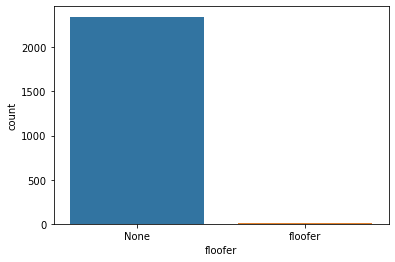

In [27]:
sns.countplot(x="floofer", data=twitter_archive_enhanced_df);

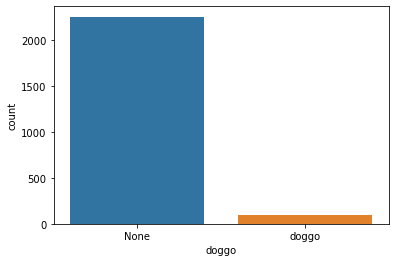

In [28]:
sns.countplot(x="doggo", data=twitter_archive_enhanced_df);

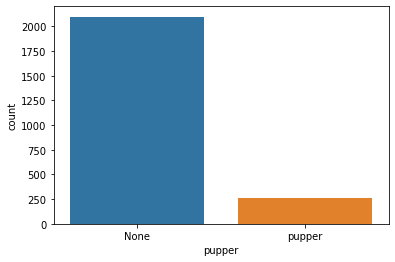

In [29]:
sns.countplot(x="pupper", data=twitter_archive_enhanced_df);

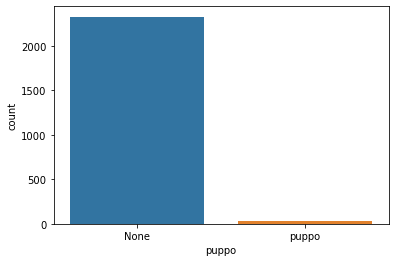

In [30]:
sns.countplot(x="puppo", data=twitter_archive_enhanced_df);

<a id="DQ2"></a>


<b> We can also see from the graphs above that the vast majority of dogs stages such as pupper, doggo and floofer are mostly not filled in. They didn't show as Nulls because there was a string saying 'None' in there instead in most rows - which can be seen as we visualise the distribution like this.</b>

<a id="TJF"></a>


<h4>File Format 3: Save the Tweet Json File </h4>

In [31]:
##Read the tweet Json File (converted to a json using .json at the end of filename)

df = pd.read_json("tweet.json", lines=True, orient="records")

In [32]:
#examining file
df.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a id="CD2"></a>


<a id="DQ3"></a>


<h3>Cleaning the Tweet_json Data </h3>

<b>We can see that there are nested dictionaries in some of the columns, so I will put them into their own column 
or delete them if they aren't needed. To work with them I must first narrow down to those 'object' datatype columns</b>

<a id="TJC"></a>


<b>Working off a copy of the data to not affect the original </b>

In [33]:
#creating a new dataframe to with object columns in

new_df = df.select_dtypes(include=object).copy()

In [34]:
##check dataframe
new_df.head(2)

,full_text,display_text_range,entities,extended_entities,source,in_reply_to_screen_name,user,place,lang,retweeted_status,quoted_status
0,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,en,NaN,NaN
1,This is Tilly. She's just checking pup on you....,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,en,NaN,NaN


In [35]:
#Put the ID column back into the new dataframe

new_df.insert(0, "ID", df["id"])

In [36]:


new_df.head(2)

,ID,full_text,display_text_range,entities,extended_entities,source,in_reply_to_screen_name,user,place,lang,retweeted_status,quoted_status
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,en,NaN,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,en,NaN,NaN


<b> We can see there are still columns to remove (that aren't nested dictionaries) so will remove them)

In [37]:
##Select the columns

cols_to_remove = ["full_text", "source", "in_reply_to_screen_name", "place",
                 "lang", "retweeted_status", "quoted_status"]

In [38]:
##drop the columns
new_df = new_df.drop(cols_to_remove, axis=1)

<a id="DQ3"></a>


<b>The 'display_text_range' columns contains the number of characters per tweet which could be data we want to analyse, but it's in a list. So Flatten the `display_text_range` column to get the character as a single number </b>

In [39]:
## Split list here

df["display_text_range"] = pd.Series(new_df["display_text_range"].apply(pd.Series)[1], name="ranges")

In [40]:
## Now removing the column - I've already processed it

new_df = new_df.drop("display_text_range", axis=1)

In [41]:
new_df.head(3)

,ID,entities,extended_entities,user
0,892420643555336193,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [42]:
new_df["entities"][4]

{'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 891327551943041024,
   'id_str': '891327551943041024',
   'indices': [139, 162],
   'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg',
   'url': 'https://t.co/AtUZn91f7f',
   'display_url': 'pic.twitter.com/AtUZn91f7f',
   'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1',
   'type': 'photo',
   'sizes': {'small': {'w': 680, 'h': 510, 'resize': 'fit'},
    'large': {'w': 720, 'h': 540, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 720, 'h': 540, 'resize': 'fit'}}}]}

<a id="DQ4"></a>


<b>The 'User' columns contains on the user which could be data we want to analyse, but it's in a nested dictionary. So we need to Flatten the 'User' column to get this in a form we can analyse.



In [43]:
## This is user data - keeping it seperate at first

user_df = new_df["user"].apply(pd.Series)

In [44]:
user_df.head(2)

,id,id_str,name,screen_name,location,description,url,entities,protected,followers_count,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,4196983835,4196983835,WeRateDogs™ (author),dog_rates,"DM YOUR DOGS, WE WILL RATE",#1 Source for Professional Dog Ratings | STORE...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,3200889,...,000000,000000,False,True,False,False,True,False,False,none
1,4196983835,4196983835,WeRateDogs™ (author),dog_rates,"DM YOUR DOGS, WE WILL RATE",#1 Source for Professional Dog Ratings | STORE...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,3200889,...,000000,000000,False,True,False,False,True,False,False,none


<b>Removing the entities and extended_entities columns as I don't want these for analysis</b> 

In [45]:
tweet_df = df.drop(["entities", "extended_entities"], axis=1)

<b>Next I will merge the user data and original tweet data. As there isn't a column that matches exactly anymore, I will check if there is one user record for each tweet record </b>

In [46]:
tweet_df.shape

(2354, 29)

In [47]:
len(tweet_df["id"].unique())

2354

In [48]:
user_df.shape

(2354, 42)

<b>There is as we can see by the 2345 records for both.</b>

<b> Now we will Rename common columns in the Tweet and User dataframes as this will prevent merging if they are named the same thing. </b>

In [49]:
tweet_df = tweet_df.rename(columns={"created_at": "created_at_tweet",
                        "id": "id_tweet",
                         "id_str": "id_str_tweet", "lang": "lang_tweet"})

In [50]:
user_df = user_df.rename(columns={"created_at": "created_at_user",
                        "id": "id_user",
                         "id_str": "id_str_user",
                        "lang": "lang_user"})

In [51]:
tweets_users_df = pd.concat([tweet_df, user_df], axis=1)


<b> Visual Assessment of the data</b>

In [52]:
tweets_users_df.head(2)

,created_at_tweet,id_tweet,id_str_tweet,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,85,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,000000,000000,False,True,False,False,True,False,False,none
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,138,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,000000,000000,False,True,False,False,True,False,False,none


<a id="DTI1"></a>


<b>We can see that Multiple types of observational units are stored in the same table (tweets and users in this case) which is a Data Tidiness Issue. </b>



<a id="TJFPA"></a>


<b>3) Tweets File Programmatic Assessment </b>

In [53]:
tweets_users_df.head(2)

,created_at_tweet,id_tweet,id_str_tweet,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,85,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,000000,000000,False,True,False,False,True,False,False,none
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,138,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,000000,000000,False,True,False,False,True,False,False,none


In [54]:
#Use describe method for this to show basic statistics for the numerical columns 
tweets_users_df.describe()

,id_tweet,id_str_tweet,display_text_range,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,...,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,id_user,followers_count,friends_count,listed_count,favourites_count,statuses_count
count,2.354000e+03,2.354000e+03,2354.000000,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,...,2211.0,2211.0,2.900000e+01,2.900000e+01,2.354000e+03,2.354000e+03,2354.0,2354.000000,2354.000000,2354.0
mean,7.426978e+17,7.426978e+17,111.202209,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,...,0.0,0.0,8.162686e+17,8.162686e+17,4.196984e+09,3.200942e+06,104.0,2799.480884,114031.010195,5288.0
std,6.852812e+16,6.852812e+16,27.364407,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,...,0.0,0.0,6.164161e+16,6.164161e+16,0.000000e+00,4.457302e+01,0.0,11.178223,0.100478,0.0
min,6.660209e+17,6.660209e+17,11.000000,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,...,0.0,0.0,6.721083e+17,6.721083e+17,4.196984e+09,3.200799e+06,104.0,2724.000000,114031.000000,5288.0
25%,6.783975e+17,6.783975e+17,93.000000,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,...,0.0,0.0,7.888183e+17,7.888183e+17,4.196984e+09,3.200898e+06,104.0,2788.000000,114031.000000,5288.0
50%,7.194596e+17,7.194596e+17,116.000000,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,...,0.0,0.0,8.340867e+17,8.340867e+17,4.196984e+09,3.200945e+06,104.0,2803.000000,114031.000000,5288.0
75%,7.993058e+17,7.993058e+17,137.000000,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,...,0.0,0.0,8.664587e+17,8.664587e+17,4.196984e+09,3.200953e+06,104.0,2805.000000,114031.000000,5288.0
max,8.924206e+17,8.924206e+17,165.000000,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,...,0.0,0.0,8.860534e+17,8.860534e+17,4.196984e+09,3.201018e+06,104.0,2846.000000,114032.000000,5288.0


In [55]:
#Looking at the number of Rows and columns
tweets_users_df.shape

(2354, 71)

In [56]:
#Looking for duplicated tweets - there are 0
tweets_users_df.id_tweet.duplicated().sum()

0

In [57]:
#Looking for Null values - there are many
tweets_users_df.isna().sum().sum()

34940

<b>There are many so I will look in each row for those with lots of Null values</b>

In [58]:
a = tweets_users_df.isna().sum()
a.head(50)

created_at_tweet                    0
id_tweet                            0
id_str_tweet                        0
full_text                           0
truncated                           0
display_text_range                  0
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang_tweet                          0
retweeted_status                 2175
quoted_statu

<a id="CD3"></a>


<h3> Further Cleaning of the Tweet_json data</h3>

<b>Removing Columns with lots of nulls in</b>

In [59]:
##Select the columns

null_cols_to_remove = ["in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id",
                                       "in_reply_to_user_id", 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 
                      'coordinates', 'place', 'contributors', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
                      'quoted_status', 'utc_offset', 'time_zone']

In [60]:
##drop the columns
tweets_users_df = tweets_users_df.drop(null_cols_to_remove, axis=1)

In [61]:
tweets_users_df.head(3)

,created_at_tweet,id_tweet,id_str_tweet,full_text,truncated,display_text_range,source,user,is_quote_status,retweet_count,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,85,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,...,000000,000000,False,True,False,False,True,False,False,none
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,138,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,...,000000,000000,False,True,False,False,True,False,False,none
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,121,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,...,000000,000000,False,True,False,False,True,False,False,none


<b>Analysis of the tweets:  </b>

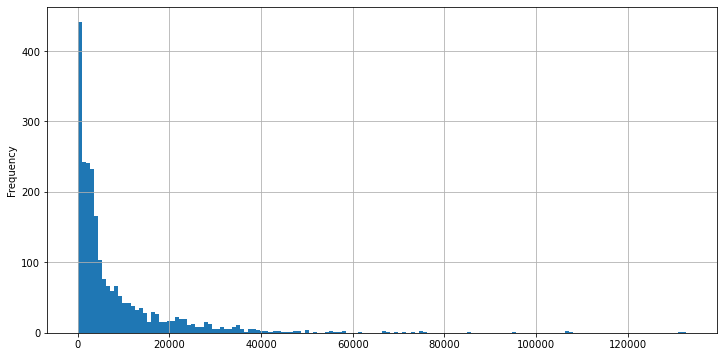

In [63]:
#Plot the column for favourited tweets count
plt.rcParams["figure.figsize"] = (12, 6)
tweets_users_df["favorite_count"].plot.hist(bins=150)

plt.grid()

In [64]:
#Plot the boxplot for favourited tweets count


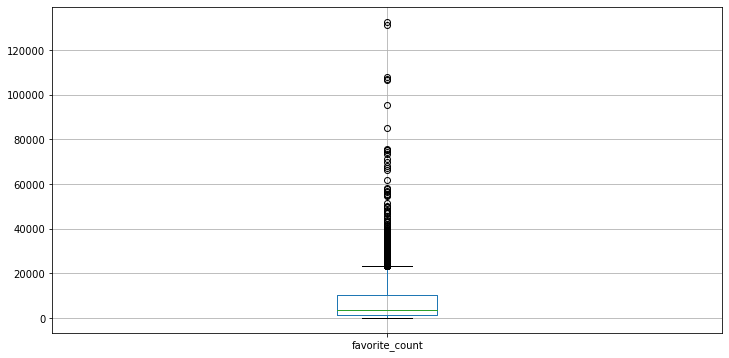

In [65]:
tweets_users_df.boxplot(column="favorite_count");

In [66]:
tweets_users_df['favorite_count'].median()

3603.5

In [67]:
tweets_users_df['favorite_count'].mean()

8080.968564146135

<b>We can see from the above frequency distribution and the boxplot that the favourite count is heavily left-skewed, with most results being less than 5,000, and the median at 3603. However there are a large number of outliers in the top quartile as we can see from the box plot which cause the mean to be such much higher at 8,081 </b> 

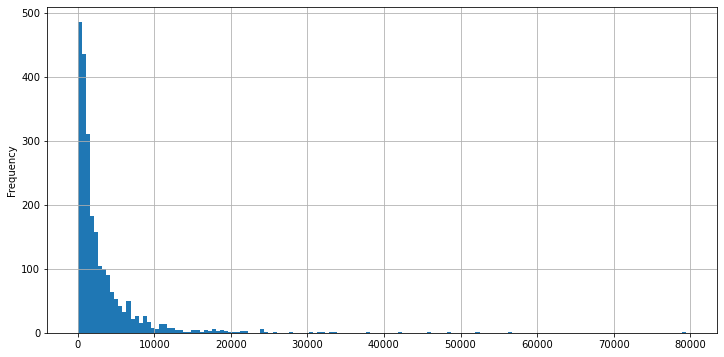

In [68]:
#Plot the column for favourited tweets
plt.rcParams["figure.figsize"] = (12, 6)
tweets_users_df["retweet_count"].plot.hist(bins=150)

plt.grid()

<a id="DQ7"></a>


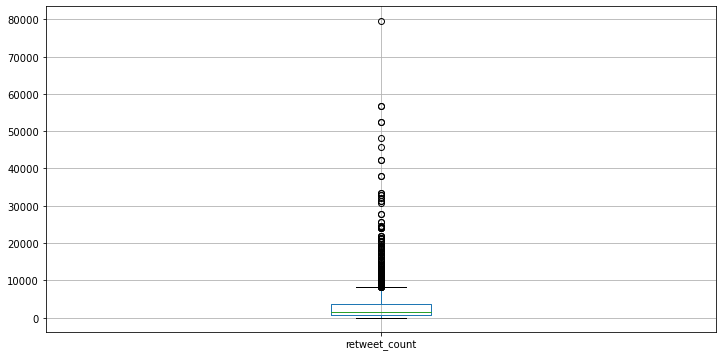

In [69]:
tweets_users_df.boxplot(column="retweet_count");

<b> We can see a very similar pattern with Retweets  from the above frequency distribution and the boxplot that the favourite count is heavily left-skewed, with most results being less than 5,000, and a large number of outliers in the top quartile as we can see from the box plot</b>

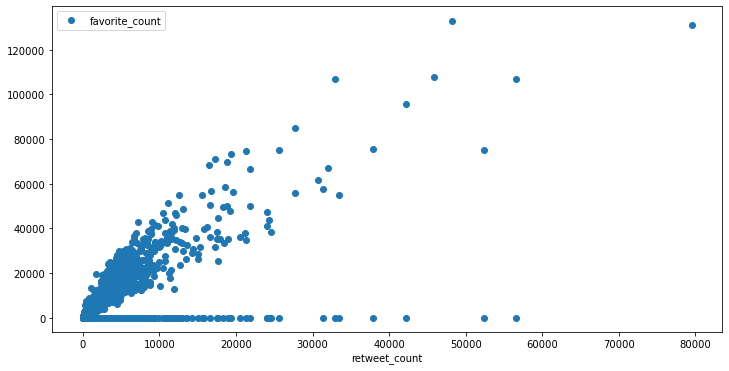

In [70]:
tweets_users_df.plot(kind = 'line', x='retweet_count', y='favorite_count', style='o')


<b>We can see from this graph that there is a linear relationship between favourites and retweets.</b>

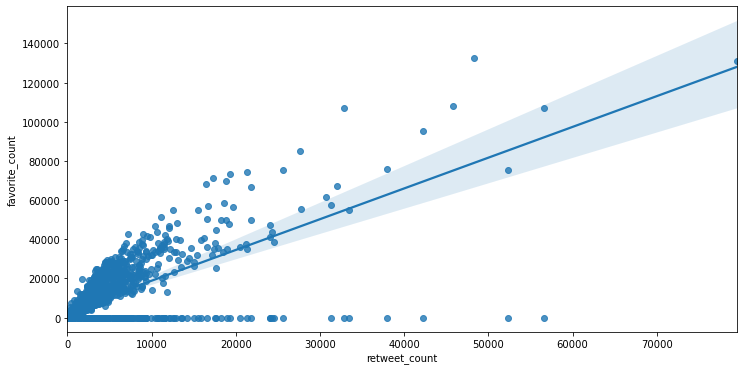

In [71]:

sns.regplot(x='retweet_count', y='favorite_count', data=tweets_users_df)

In [72]:
X = tweets_users_df['retweet_count']
Y = tweets_users_df['favorite_count']
X = sm.add_constant(X)
results1 = sm.OLS(Y, X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     2297.
Date:                Sat, 19 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:11:48   Log-Likelihood:                -24611.
No. Observations:                2354   AIC:                         4.923e+04
Df Residuals:                    2352   BIC:                         4.924e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3107.8692    201.951     15.389      0.000    2711.849    3503.889
retweet_count     1.5714      0.033     47.923      0.000       1.507       1.636
==============================================================================
Omnibus:                     1034.735   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42336.254
Skew:                          -1.368   Prob(JB):                         0.00
Kurtosis:                      23.595   Cond. No.                     7.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b> We can see from this linear regression analysis, from the Adj. R-squared number of 0.494 that this is likely a significant factor that more retweets will cause more favourites, and the low P number indicates it is statistically likely to be a cause of movement - however as the condition number is so large, there may also be problems with high correlation between the factors essentially confusing the results.</b> 

In [73]:
#examning the columns
tweets_users_df.columns.tolist()

['created_at_tweet',
 'id_tweet',
 'id_str_tweet',
 'full_text',
 'truncated',
 'display_text_range',
 'source',
 'user',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang_tweet',
 'id_user',
 'id_str_user',
 'name',
 'screen_name',
 'location',
 'description',
 'url',
 'entities',
 'protected',
 'followers_count',
 'friends_count',
 'listed_count',
 'created_at_user',
 'favourites_count',
 'geo_enabled',
 'verified',
 'statuses_count',
 'lang_user',
 'contributors_enabled',
 'is_translator',
 'is_translation_enabled',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_background_tile',
 'profile_image_url',
 'profile_image_url_https',
 'profile_banner_url',
 'profile_link_color',
 'profile_sidebar_border_color',
 'profile_sidebar_fill_color',
 'profile_text_color',
 'profile_use_background_image',
 'has_extended_profile',
 'defa

<a id="MT"></a>


<h2>Merging the dataframes into a Master Tweet Archive</h2>

<h2>To merge the tables together and examine them, we need to find a column that is common to all of them, which in this case is the tweet ID Column</h2>

<b> First I will need to rename tweet ID in the twitter_archive_enhanced_df dataframe </b>

In [74]:
#examning the columns
tweets_users_df.columns.tolist()

['created_at_tweet',
 'id_tweet',
 'id_str_tweet',
 'full_text',
 'truncated',
 'display_text_range',
 'source',
 'user',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang_tweet',
 'id_user',
 'id_str_user',
 'name',
 'screen_name',
 'location',
 'description',
 'url',
 'entities',
 'protected',
 'followers_count',
 'friends_count',
 'listed_count',
 'created_at_user',
 'favourites_count',
 'geo_enabled',
 'verified',
 'statuses_count',
 'lang_user',
 'contributors_enabled',
 'is_translator',
 'is_translation_enabled',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_background_tile',
 'profile_image_url',
 'profile_image_url_https',
 'profile_banner_url',
 'profile_link_color',
 'profile_sidebar_border_color',
 'profile_sidebar_fill_color',
 'profile_text_color',
 'profile_use_background_image',
 'has_extended_profile',
 'defa

In [75]:
tweets_users_df = tweets_users_df.rename(columns={"id_tweet": "tweet_id"})
tweets_users_df

,created_at_tweet,tweet_id,id_str_tweet,full_text,truncated,display_text_range,source,user,is_quote_status,retweet_count,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,85,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,...,000000,000000,False,True,False,False,True,False,False,none
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,138,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,...,000000,000000,False,True,False,False,True,False,False,none
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,121,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,...,000000,000000,False,True,False,False,True,False,False,none
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,79,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,...,000000,000000,False,True,False,False,True,False,False,none
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,138,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,...,000000,000000,False,True,False,False,True,False,False,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,120,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,41,...,000000,000000,False,True,False,False,True,False,False,none
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,137,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,147,...,000000,000000,False,True,False,False,True,False,False,none
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,130,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,47,...,000000,000000,False,True,False,False,True,False,False,none
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,139,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,48,...,000000,000000,False,True,False,False,True,False,False,none


In [76]:
imagepreds_twitter_archive_enhanced = pd.merge(image_predictions_df, twitter_archive_enhanced_df, on='tweet_id', how='outer')
imagepreds_twitter_archive_enhanced

,tweet_id,jpg_url,img_num,prediction1,pred1_confidence,p1_dog,prediction2,pred2_confidence,p2_dog,prediction3,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,671550332464455680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,1,10,None,None,None,None,None
2352,669684865554620416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,11,10,None,None,None,None,None
2353,668967877119254528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,12,10,None,None,None,None,None
2354,668587383441514497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None


In [77]:
twitter_archive_master_df = pd.merge(imagepreds_twitter_archive_enhanced, tweets_users_df, on='tweet_id', how='outer')
twitter_archive_master_df.head()

,tweet_id,jpg_url,img_num,prediction1,pred1_confidence,p1_dog,prediction2,pred2_confidence,p2_dog,prediction3,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,000000,000000,False,True,False,False,True,False,False,none
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,000000,000000,False,True,False,False,True,False,False,none
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,000000,000000,False,True,False,False,True,False,False,none
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,000000,000000,False,True,False,False,True,False,False,none
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,000000,000000,False,True,False,False,True,False,False,none


<b>We have created the master dataframe by combining the previous dataframes.</b>



<a id="CD4"></a>


<h2>Cleaning the Master Tweet Archive Dataframe </h2>

<b> There are too many columns with many that we don't need for our analysis. So I will get rid off them.</b>

<a id="DQ5"></a>


In [78]:
twitter_archive_master_df = twitter_archive_master_df.drop(['geo_enabled',
 'verified',
 'statuses_count',
 'lang_user',
 'contributors_enabled',
 'is_translator',
 'is_translation_enabled',
 'profile_background_color',
 'profile_background_image_url',
 'profile_background_image_url_https',
 'profile_background_tile',
 'profile_image_url',
 'profile_image_url_https',
 'profile_banner_url',
 'profile_link_color',
 'profile_sidebar_border_color',
 'profile_sidebar_fill_color',
 'profile_text_color',
 'profile_use_background_image',
 'has_extended_profile',
 'default_profile',
 'default_profile_image',
 'follow_request_sent',
 'notifications',
 'translator_type'], axis=1)


<b> Next I am looking to see what the most common types of dogs are by looking at the 'prediction1' values, under the assumptions that they are at least mostly correct.</b>

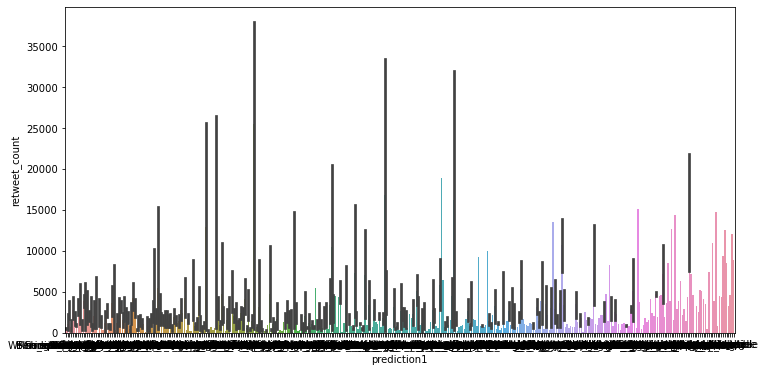

In [79]:
sns.barplot(y='retweet_count',x='prediction1',data=twitter_archive_master_df)

<a id="DQ8"></a>

<b> We can see below that for the prediciton algorithm, it is guessing things other than dogs(such as 'ice lolly' and 'seat_belt' which affects our analysis trying to compare how people reacted to different dogs - this a data quality issue. </b>

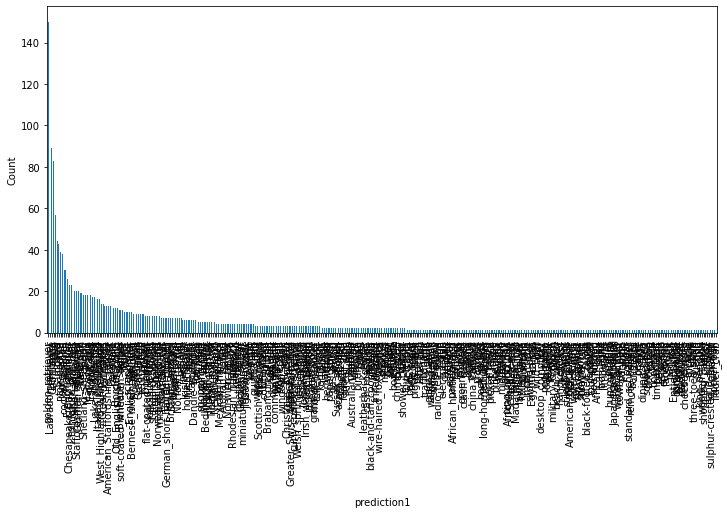

In [80]:
twitter_archive_master_df["prediction1"].value_counts().plot.bar()

plt.xlabel("prediction1")
plt.ylabel("Count");

<b> We can see that there are too many value to assess this properly, so I will get rid of those with less than 20 predictions.</b> 

In [81]:
counts = twitter_archive_master_df["prediction1"].value_counts()

counts_df = twitter_archive_master_df.loc[twitter_archive_master_df["prediction1"].isin(counts.index[counts > 20])]

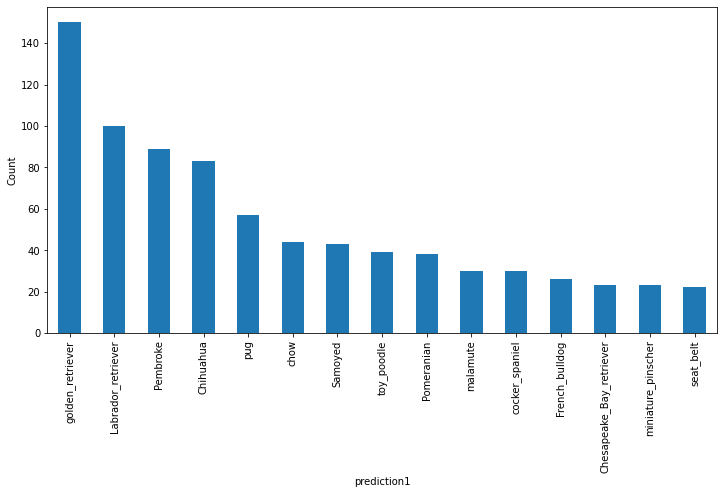

In [82]:
counts_df["prediction1"].value_counts().plot.bar()

plt.xlabel("prediction1")
plt.ylabel("Count");




<b> We can see that the top 3 dogs are Golden retreivers, Labradors and Pembrokes, closely followed by Chihuanhua's. However this is assuming the algorith is correct so the results should be taken with caution.</b>

In [83]:
twitter_archive_master_df['prediction1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

<b>Converting the final Master Archive/Joined Dataframe to a CSV File</b>

In [84]:
twitter_archive_master_df.to_csv(r'twitter_archive_master.csv')

<b> Looking at the correlations of different numerical columns </b>

In [85]:
#Remove columns we don't need for correlations
corr_cols_to_remove = ["tweet_id", "img_num", "pred1_confidence", "pred2_confidence",
                 "pred3_confidence", "id_str_tweet", "id_user", "possibly_sensitive", "possibly_sensitive_appealable"]

In [86]:
twitter_archive_master_df_corrs_pre = twitter_archive_master_df.drop(corr_cols_to_remove, axis=1)

twitter_archive_master_df_corrs = twitter_archive_master_df_corrs_pre.corr()
twitter_archive_master_df_corrs

,rating_numerator,rating_denominator,display_text_range,retweet_count,favorite_count,followers_count,friends_count,listed_count,favourites_count
rating_numerator,1.000000,0.150388,-0.063315,-0.000231,-0.000536,-0.040076,NaN,-0.035420,-0.006456
rating_denominator,0.150388,1.000000,-0.035116,-0.022579,-0.023141,0.010063,NaN,0.022779,-0.006857
display_text_range,-0.063315,-0.035116,1.000000,-0.041832,-0.100613,0.107478,NaN,0.101206,0.065869
retweet_count,-0.000231,-0.022579,-0.041832,1.000000,0.702881,-0.357878,NaN,-0.344351,-0.008389
favorite_count,-0.000536,-0.023141,-0.100613,0.702881,1.000000,-0.438260,NaN,-0.432206,-0.017588
followers_count,-0.040076,0.010063,0.107478,-0.357878,-0.438260,1.000000,NaN,0.791003,-0.203942
friends_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listed_count,-0.035420,0.022779,0.101206,-0.344351,-0.432206,0.791003,NaN,1.000000,0.240071
favourites_count,-0.006456,-0.006857,0.065869,-0.008389,-0.017588,-0.203942,NaN,0.240071,1.000000


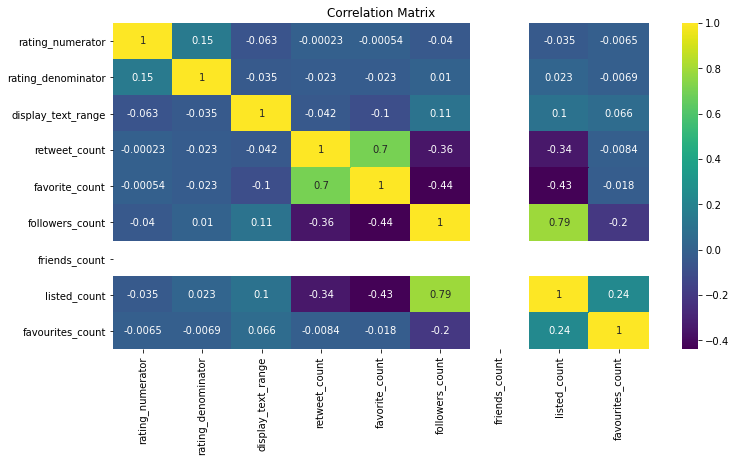

In [87]:
#Showing in a heatmap
sns.heatmap(twitter_archive_master_df_corrs, cmap="viridis", annot=True)

plt.title("Correlation Matrix");

<b> We can see that the Tweet's Retweet and Favourite Count are highly positively correlated at 0.7. There are no other strong correlation suggestions from this heatmap. </b>

<b>By looking at the 'display_text_range' column, we can see how the number of characters of each tweet is distributed </b>

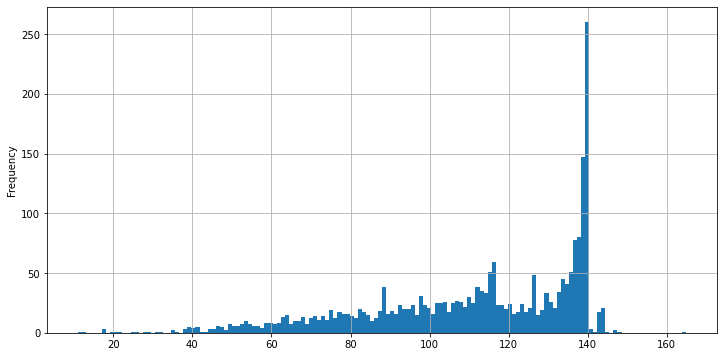

In [88]:
#Plot the column for display length
plt.rcParams["figure.figsize"] = (12, 6)
twitter_archive_master_df["display_text_range"].plot.hist(bins=150)

plt.grid()

In [89]:
twitter_archive_master_df["display_text_range"].mean()

111.20220900594732

In [90]:
twitter_archive_master_df["display_text_range"].median()

116.0

In [91]:
twitter_archive_master_df["display_text_range"].mode()

0    140.0
dtype: float64

<b>We can see the mean and median text is around 115 characters, but the mode(most popular result) is 140 characters, and very few are above that. This is likely because the character limit used to be 140 so people would type until the maximum, while in 2017 it was lifted to 280 per tweet so some of the tweets go above that but not many. </b>